In [1]:
15 + 25 +9+ 5 +15 +16 +5+ 6 +10+ 101 +10 +21 +94 +11+ 18 +5+ 7+ 6+ 7+ 21+ 6+ 14 +14+ 7+ 24+ 5 +18+ 15 +5 +16 +16 +20 +17 +29 +5+ 36 +17 +17 +16 +19 +28 +8 +5 +13 +9 +9 +15 +10 +8 +47 +66 +32 +36 +7 +33 +10 +11 +11 +8 +7 +10

1106

In [2]:
1106/61

18.131147540983605

In [4]:
61/37

1.6486486486486487

In [5]:
53 / 40

1.325

In [12]:
92 + 14 - 134

-28

In [9]:
23.79 * 53 / 40

31.521749999999997

In [59]:
import datetime
d1 = datetime.datetime(2016,6,11)   # 第一个日期
d2 = datetime.datetime(2016,9,1)   # 第二个日期
interval = d2 - d1                   # 两日期差距
interval.days                        # 具体的天数                     



82

In [54]:
9.19 - 7.35

1.8399999999999999

In [22]:
192 + 181 + 162 + 134

669

In [23]:
669 / 4

167.25

In [24]:
167.25/30

5.575

In [25]:
import numpy as np
import os
import pandas as pd
import glob
from netCDF4 import Dataset, num2date
import netCDF4 as nc
import time
import datetime

path = r'C:\Users\mymylove\Desktop\热浪\nino34.nc'
nc0 = Dataset(path)

In [26]:
nc0.variables

{'WEDCEN2': <class 'netCDF4._netCDF4.Variable'>
 float64 WEDCEN2(WEDCEN2)
     units: days since 1900-01-01 00:00:00
     axis: T
     time_origin: 01-JAN-1900 00:00:00
     standard_name: time
 unlimited dimensions: WEDCEN2
 current shape = (2153,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'NINO34': <class 'netCDF4._netCDF4.Variable'>
 float64 NINO34(WEDCEN2)
     missing_value: -1e+34
     _FillValue: -1e+34
     long_name: Nino 3.4 Region SSTA (base period 1982-2005, data from OISST)
     units: degC
 unlimited dimensions: WEDCEN2
 current shape = (2153,)
 filling on}

In [32]:
nino = nc0.variables['NINO34'][:]

In [33]:
nino.data

array([-1.01012932, -0.80129492, -0.50846722, ..., -0.69281045,
       -0.86387998, -0.57410603])

In [41]:
2153/365

5.898630136986301

In [34]:
nino.shape

(2153,)

In [35]:
path = r'C:\Users\mymylove\Desktop\热浪\nino34_uncertainty.nc'
nc0 = Dataset(path)

In [36]:
nc0.variables

{'WEDCEN2': <class 'netCDF4._netCDF4.Variable'>
 float64 WEDCEN2(WEDCEN2)
     units: days since 1900-01-01 00:00:00
     time_origin: 01-JAN-1900 00:00:00
     axis: T
     standard_name: time
 unlimited dimensions: WEDCEN2
 current shape = (2153,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'NINO34_TOTAL_ERR': <class 'netCDF4._netCDF4.Variable'>
 float64 NINO34_TOTAL_ERR(WEDCEN2)
     missing_value: -1e+34
     _FillValue: -1e+34
     long_name: nino34 Estimated Total Error
     units: degC
 unlimited dimensions: WEDCEN2
 current shape = (2153,)
 filling on,
 'NINO34_SATELLITE_ERR': <class 'netCDF4._netCDF4.Variable'>
 float64 NINO34_SATELLITE_ERR()
     missing_value: -1e+34
     _FillValue: -1e+34
     long_name: nino34 Estimated Satellite Bias Error
     units: degC
     long_name_mod: T=31-OCT-1981 12:00:04-FEB-2023 12:00
 unlimited dimensions: 
 current shape = ()
 filling on,
 'NINO34_ANALYSIS_ERR': <class 'netCDF4._netCDF4.Variable'>
 float64 NINO34_ANALYSI

In [38]:
nino = nc0.variables['NINO34_ANALYSIS_ERR'][:]
nino.data

array([0.01323648, 0.00526719, 0.00104655, ..., 0.0010684 , 0.00098831,
       0.00100374])

In [39]:
nino.shape

(2153,)

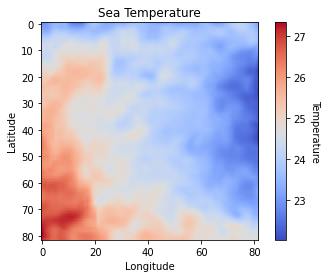

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# 生成假数据
data = np.load(r'D:\heat_wave\atlantic\SST_82_21_expand_atlantic_area.npz')['sst']
data = data[0,:,:]

# 绘制海温图
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='coolwarm')

# 添加颜色条
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Temperature', rotation=-90, va="bottom")

# 添加标题和标签
ax.set_title('Sea Temperature')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# 显示图像
plt.show()

In [94]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import random
import netCDF4
import seaborn as sns
from global_land_mask import globe
from scipy import interpolate

In [97]:
data = np.load(r'D:\heat_wave\atlantic\SST_82_21_expand_atlantic_area.npz') #['time', 'lat', 'lon', 'mld', 'salinity', 'temp', 'u', 'v']
sst = data['sst']
sst.shape

(14610, 82, 82)

In [99]:
lat = data['lat']
lat.shape
lat

array([-30.125, -29.875, -29.625, -29.375, -29.125, -28.875, -28.625,
       -28.375, -28.125, -27.875, -27.625, -27.375, -27.125, -26.875,
       -26.625, -26.375, -26.125, -25.875, -25.625, -25.375, -25.125,
       -24.875, -24.625, -24.375, -24.125, -23.875, -23.625, -23.375,
       -23.125, -22.875, -22.625, -22.375, -22.125, -21.875, -21.625,
       -21.375, -21.125, -20.875, -20.625, -20.375, -20.125, -19.875,
       -19.625, -19.375, -19.125, -18.875, -18.625, -18.375, -18.125,
       -17.875, -17.625, -17.375, -17.125, -16.875, -16.625, -16.375,
       -16.125, -15.875, -15.625, -15.375, -15.125, -14.875, -14.625,
       -14.375, -14.125, -13.875, -13.625, -13.375, -13.125, -12.875,
       -12.625, -12.375, -12.125, -11.875, -11.625, -11.375, -11.125,
       -10.875, -10.625, -10.375, -10.125,  -9.875], dtype=float32)

In [101]:
lon = data['lon']
lon.shape
lon

array([329.875, 330.125, 330.375, 330.625, 330.875, 331.125, 331.375,
       331.625, 331.875, 332.125, 332.375, 332.625, 332.875, 333.125,
       333.375, 333.625, 333.875, 334.125, 334.375, 334.625, 334.875,
       335.125, 335.375, 335.625, 335.875, 336.125, 336.375, 336.625,
       336.875, 337.125, 337.375, 337.625, 337.875, 338.125, 338.375,
       338.625, 338.875, 339.125, 339.375, 339.625, 339.875, 340.125,
       340.375, 340.625, 340.875, 341.125, 341.375, 341.625, 341.875,
       342.125, 342.375, 342.625, 342.875, 343.125, 343.375, 343.625,
       343.875, 344.125, 344.375, 344.625, 344.875, 345.125, 345.375,
       345.625, 345.875, 346.125, 346.375, 346.625, 346.875, 347.125,
       347.375, 347.625, 347.875, 348.125, 348.375, 348.625, 348.875,
       349.125, 349.375, 349.625, 349.875, 350.125], dtype=float32)

In [102]:
sst1 = np.mean(sst, axis = 0)
sst1.shape

(82, 82)

In [103]:
sst1

array([[21.25178 , 21.252222, 21.256779, ..., 20.71922 , 20.701763,
        20.683102],
       [21.395422, 21.397638, 21.403332, ..., 20.833586, 20.816994,
        20.799816],
       [21.541346, 21.545628, 21.552948, ..., 20.944153, 20.928907,
        20.912367],
       ...,
       [27.007277, 26.984169, 26.961279, ..., 24.887712, 24.86991 ,
        24.847717],
       [27.04764 , 27.024378, 27.002007, ..., 24.978807, 24.960482,
        24.938534],
       [27.087137, 27.06381 , 27.042284, ..., 25.061632, 25.042301,
        25.01998 ]], dtype=float32)

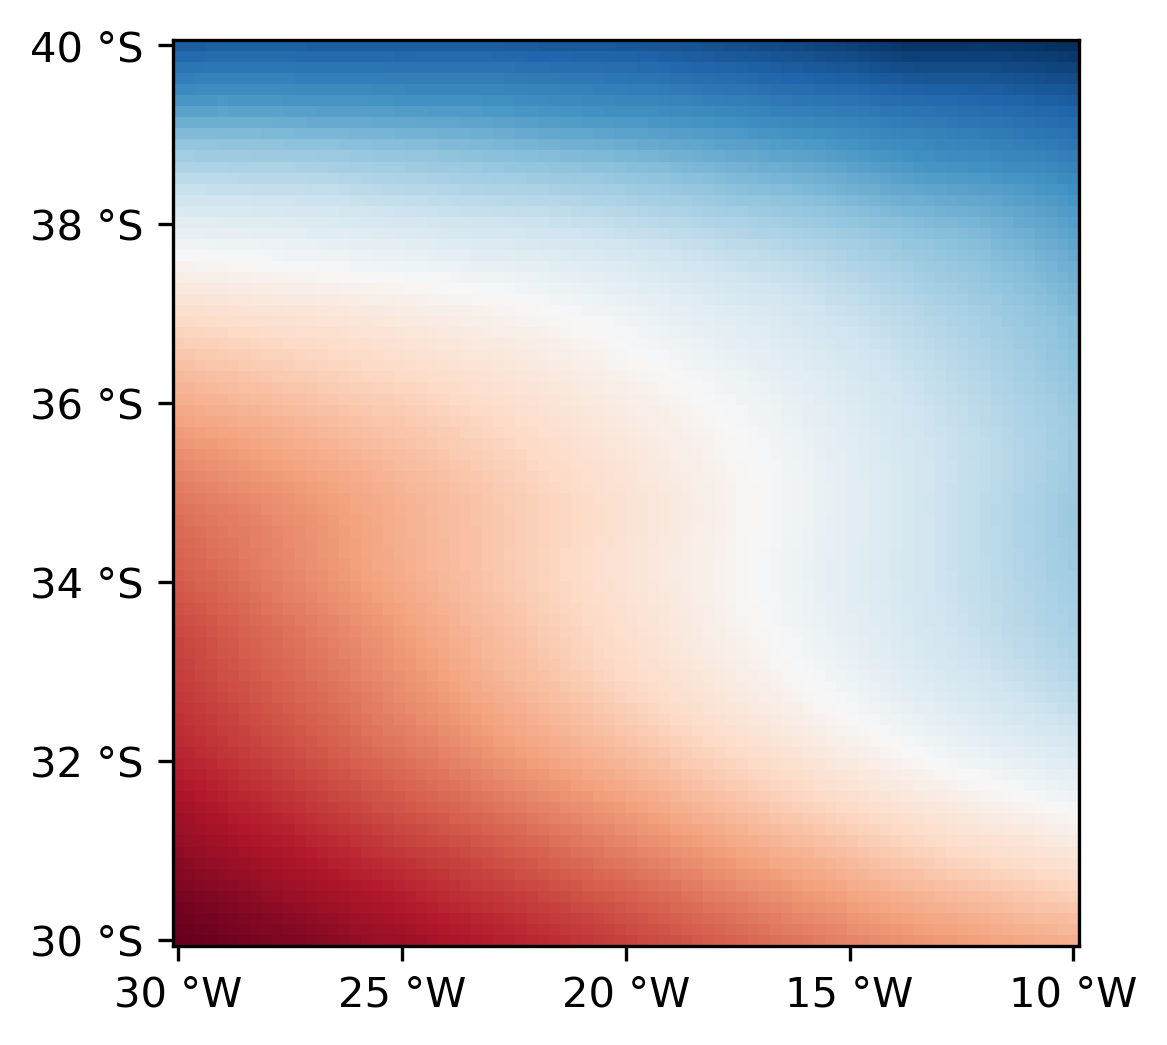

In [115]:
# 可视化海洋上的SST分布
plt.figure(dpi=300)
plt.xticks([])  # 去掉x轴
plt.yticks([])  # 去掉y轴
# plt.title("SST(ɛ - 0)", loc='left',fontsize='xx-large',fontweight='light')
# h = plt.imshow(sst1[::-1, :], cmap=plt.cm.RdBu_r)
# h = plt.imshow(sst1[::-1, :], cmap=plt.cm.RdBu_r)
h = plt.imshow(sst1, cmap=plt.cm.RdBu_r)
# cb = plt.colorbar(h,orientation='horizontal')
# cb.ax.tick_params(labelsize=24)
# ax.tick_params(labelsize=16)
# 画框
ax = plt.gca()

#添加x轴刻度
tick_locs = np.linspace(0,81,5)

plt.xticks(tick_locs, ['30 °W','25 °W','20 °W','15 °W','10 °W'])

#添加Y轴刻度
tick_locs_y = np.linspace(0,81,6)

plt.yticks(tick_locs_y, ['40 °S','38 °S','36 °S','34 °S','32 °S', '30 °S'])

# 默认框的颜色是黑色，第一个参数是左上角的点坐标
# 第二个参数是宽，第三个参数是长
ax.add_patch(plt.Rectangle((760, 220), 201, 41, color = 'black',fill=False, linewidth=4))  # 0-1440   0-681
plt.show()  

In [ ]:
40S 38 36 34 32 30S